# Loading Libraries and Data

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from modules.utils import map_dataframe_column, set_text_params
from modules.feature_analysis import categorical_by_categorical, categorical_by_numerical

In [2]:
# Load csv
df = pd.read_csv('../data/raw/telco-customer-churn.csv')

In [3]:
# Columns have non-standardized naming conventions
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
# Using regex to make column names snake case
df.columns = ['_'.join(re.sub(r'([A-Z]+)', r' \1', x).split()).lower() for x in df.columns]
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

# Missing Data and Type Conversion

In [5]:
# Check for duplicate entries, none found
df.loc[df.duplicated()]

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn


In [6]:
# No non-null entries, further investigation needed for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   int64  
 3   partner            7043 non-null   object 
 4   dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   phone_service      7043 non-null   object 
 7   multiple_lines     7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streaming_tv       7043 non-null   object 
 14  streaming_movies   7043 non-null   object 
 15  contract           7043 non-null   object 
 16  paperless_billing  7043 

In [7]:
# Extracting value counts to check for missing or unusual values
value_counts = [df[x].value_counts() for x in df.columns]

In [8]:
# Empty total_charges value does not make sense
# Checked all of the other columns and they all contain reasonable values
value_counts[19]

total_charges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [9]:
# Checking entries with empty total charges
df.loc[df.total_charges == ' '][['customer_id', 'tenure', 'monthly_charges', 'total_charges', 'churn']]

,customer_id,tenure,monthly_charges,total_charges,churn
488,4472-LVYGI,0,52.55,,No
753,3115-CZMZD,0,20.25,,No
936,5709-LVOEQ,0,80.85,,No
1082,4367-NUYAO,0,25.75,,No
1340,1371-DWPAZ,0,56.05,,No
3331,7644-OMVMY,0,19.85,,No
3826,3213-VVOLG,0,25.35,,No
4380,2520-SGTTA,0,20.00,,No
5218,2923-ARZLG,0,19.70,,No
6670,4075-WKNIU,0,73.35,,No


In [10]:
# Only customers with zero tenure have empty total_charges, implying total_charges should be zero
# Total_charges = monthly_charges * tenure -> zero tenure means customer has not been charged yet
df.loc[df.tenure == 0][['customer_id', 'tenure', 'monthly_charges', 'total_charges', 'churn']]

,customer_id,tenure,monthly_charges,total_charges,churn
488,4472-LVYGI,0,52.55,,No
753,3115-CZMZD,0,20.25,,No
936,5709-LVOEQ,0,80.85,,No
1082,4367-NUYAO,0,25.75,,No
1340,1371-DWPAZ,0,56.05,,No
3331,7644-OMVMY,0,19.85,,No
3826,3213-VVOLG,0,25.35,,No
4380,2520-SGTTA,0,20.00,,No
5218,2923-ARZLG,0,19.70,,No
6670,4075-WKNIU,0,73.35,,No


In [11]:
# Check to make sure zero is not in the values already present
# Sorting is not correct since numbers are encoded as strings
# Although 0 should be missing since it should appear before any string starting with 1
sorted(value_counts[19].index.tolist())

[' ',
 '100.2',
 '100.25',
 '100.35',
 '100.4',
 '100.8',
 '100.9',
 '1001.2',
 '1001.5',
 '1003.05',
 '1004.35',
 '1004.5',
 '1004.75',
 '1005.7',
 '1006.9',
 '1007.8',
 '1007.9',
 '1008.55',
 '1008.7',
 '1009.25',
 '101.1',
 '101.45',
 '101.65',
 '101.9',
 '1010',
 '1011.05',
 '1011.5',
 '1011.8',
 '1012.4',
 '1013.05',
 '1013.2',
 '1013.35',
 '1013.6',
 '1014.25',
 '1016.7',
 '1017.35',
 '102.45',
 '102.5',
 '102.75',
 '1020.2',
 '1020.75',
 '1021.55',
 '1021.75',
 '1021.8',
 '1022.5',
 '1022.6',
 '1022.95',
 '1023.75',
 '1023.85',
 '1023.9',
 '1023.95',
 '1024',
 '1024.65',
 '1024.7',
 '1025.05',
 '1025.15',
 '1025.95',
 '1026.35',
 '1027.25',
 '1028.75',
 '1028.9',
 '1029.35',
 '1029.75',
 '1029.8',
 '103.7',
 '1031.1',
 '1031.4',
 '1031.7',
 '1032',
 '1032.05',
 '1033',
 '1033.9',
 '1033.95',
 '1035.5',
 '1035.7',
 '1036',
 '1036.75',
 '1037.75',
 '1039.45',
 '104.2',
 '104.3',
 '1041.8',
 '1042.65',
 '1043.3',
 '1043.35',
 '1043.4',
 '1043.8',
 '1045.25',
 '1046.1',
 '1046.2',
 

In [12]:
# Convert to floats and check again, removing the empty value
# 0 is indeed not present in the list
sorted([float(x) for x in value_counts[19].index if x != ' '])

[18.8,
 18.85,
 18.9,
 19.0,
 19.05,
 19.1,
 19.15,
 19.2,
 19.25,
 19.3,
 19.4,
 19.45,
 19.5,
 19.55,
 19.6,
 19.65,
 19.7,
 19.75,
 19.8,
 19.85,
 19.9,
 19.95,
 20.0,
 20.05,
 20.1,
 20.15,
 20.2,
 20.25,
 20.3,
 20.35,
 20.4,
 20.45,
 20.5,
 20.55,
 20.6,
 20.65,
 20.7,
 20.75,
 20.8,
 20.85,
 20.9,
 20.95,
 21.0,
 21.05,
 21.1,
 23.45,
 24.0,
 24.05,
 24.2,
 24.25,
 24.4,
 24.45,
 24.6,
 24.7,
 24.75,
 24.8,
 24.9,
 25.0,
 25.05,
 25.1,
 25.15,
 25.2,
 25.25,
 25.3,
 25.35,
 25.4,
 25.7,
 25.75,
 25.8,
 25.85,
 27.55,
 28.3,
 29.15,
 29.7,
 29.85,
 29.9,
 29.95,
 30.2,
 30.5,
 30.55,
 31.2,
 31.35,
 31.55,
 31.9,
 32.7,
 33.2,
 33.6,
 33.7,
 34.7,
 34.75,
 34.8,
 35.0,
 35.05,
 35.1,
 35.25,
 35.45,
 35.55,
 35.75,
 35.85,
 35.9,
 36.45,
 36.55,
 36.8,
 37.2,
 38.0,
 38.15,
 38.25,
 38.45,
 38.7,
 38.8,
 39.25,
 39.3,
 39.65,
 39.8,
 39.85,
 40.1,
 40.2,
 40.25,
 40.9,
 41.2,
 41.85,
 42.45,
 42.7,
 42.9,
 43.15,
 43.3,
 43.8,
 43.85,
 43.95,
 44.0,
 44.05,
 44.1,
 44.15,
 44.2,


In [13]:
# Save the cleaned but not encoded data for use in modeling
# df.to_csv('../data/cleaned/telco-churn-data-cleaned-not-encoded.csv', index = False)

In [14]:
# Convert columns to numeric values
# Male = 1, Female = 0
map_dataframe_column(df, 'gender', {'Male': 1, 'Female': 0})

# Yes = 1, No = 0
yes_no_col = ['partner', 'dependents', 'phone_service', 'paperless_billing', 'churn']
map_dataframe_column(df, yes_no_col, {'Yes': 1, 'No': 0})

# Yes = 1, No = 0, No service/not applicable = -1
map_dataframe_column(df, 'multiple_lines', {'Yes': 1, 'No': 0, 'No phone service': -1})

# Fiber optic = 2, DSL = 1, No = 0
map_dataframe_column(df, 'internet_service', {'Fiber optic': 2, 'DSL': 1, 'No': 0})

# Yes = 1, No - 0, No service/not applicable = -1
internet_service_cols = ['online_security', 'online_backup', 'device_protection',
                         'tech_support', 'streaming_tv', 'streaming_movies']
map_dataframe_column(df, internet_service_cols, {'Yes': 1, 'No': 0, 'No internet service': -1})

# Month-to-month = 0, One year = 1, Two year = 2
map_dataframe_column(df, 'contract', {'Month-to-month': 0, 'One year': 1, 'Two year': 2})

# Mailed check = 0, Electronic check = 1, Bank transfer = 2, Credit card = 3
map_dataframe_column(df, 'payment_method', {
    'Mailed check': 0,
    'Electronic check': 1,
    'Bank transfer (automatic)': 2,
    'Credit card (automatic)': 3
})

# Fix exmpty total charges by replacing with zero
df.total_charges = df.total_charges.apply(lambda x: 0.0 if x == ' ' else float(x))

# Remove customer_id as it has no meaning for data analysis
df = df.drop(['customer_id'], axis = 1)

In [15]:
# Checking how the dataframe looks after transformation
df

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,0,0,1,0,1,0,-1,1,0,1,0,0,0,0,0,1,1,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,0,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,0,53.85,108.15,1
3,1,0,0,0,45,0,-1,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,0,84.80,1990.50,0
7039,0,0,1,1,72,1,1,2,0,1,1,0,1,1,1,1,3,103.20,7362.90,0
7040,0,0,1,1,11,0,-1,1,1,0,0,0,0,0,0,1,1,29.60,346.45,0
7041,1,1,1,0,4,1,1,2,0,0,0,0,0,0,0,1,0,74.40,306.60,1


In [16]:
# All types are numeric now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7043 non-null   int64  
 1   senior_citizen     7043 non-null   int64  
 2   partner            7043 non-null   int64  
 3   dependents         7043 non-null   int64  
 4   tenure             7043 non-null   int64  
 5   phone_service      7043 non-null   int64  
 6   multiple_lines     7043 non-null   int64  
 7   internet_service   7043 non-null   int64  
 8   online_security    7043 non-null   int64  
 9   online_backup      7043 non-null   int64  
 10  device_protection  7043 non-null   int64  
 11  tech_support       7043 non-null   int64  
 12  streaming_tv       7043 non-null   int64  
 13  streaming_movies   7043 non-null   int64  
 14  contract           7043 non-null   int64  
 15  paperless_billing  7043 non-null   int64  
 16  payment_method     7043 

# Outlier Investigation

In [17]:
# Maximum values <= 3rd Quartile + (1.5 * IQR), so no obvious outliers in the numerical data
charges_col = ['tenure', 'monthly_charges', 'total_charges']
df[charges_col].describe()

,tenure,monthly_charges,total_charges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [18]:
# Splitting the above dataframe into a tuple of numpy arrays
charges_stats = df[charges_col].describe().values
charges_stats = tuple(np.moveaxis(charges_stats, 1, 0))
charges_stats

(array([7043.        ,   32.37114866,   24.55948102,    0.        ,
           9.        ,   29.        ,   55.        ,   72.        ]),
 array([7043.        ,   64.76169246,   30.0900471 ,   18.25      ,
          35.5       ,   70.35      ,   89.85      ,  118.75      ]),
 array([7043.        , 2279.73430356, 2266.79446969,    0.        ,
         398.55      , 1394.55      , 3786.6       , 8684.8       ]))

In [19]:
# Testing that max value > 3rd Quartile + (1.5 * IQR)
# False values indicate there are no upper outliers via IQR testing in that column
max_outliers = [x[-1] > (x[-2] + (1.5 * (x[-2] - x[-4]))) for x in charges_stats]
max_outliers

[False, False, False]

In [20]:
# Testing that min value < 1st Quartile - (1.5 * IQR)
# False values indicate there are no lower outliers via IQR testing in that column
min_outliers = [x[3] < (x[-4] - (1.5 * (x[-2] - x[-4]))) for x in charges_stats]
min_outliers

[False, False, False]

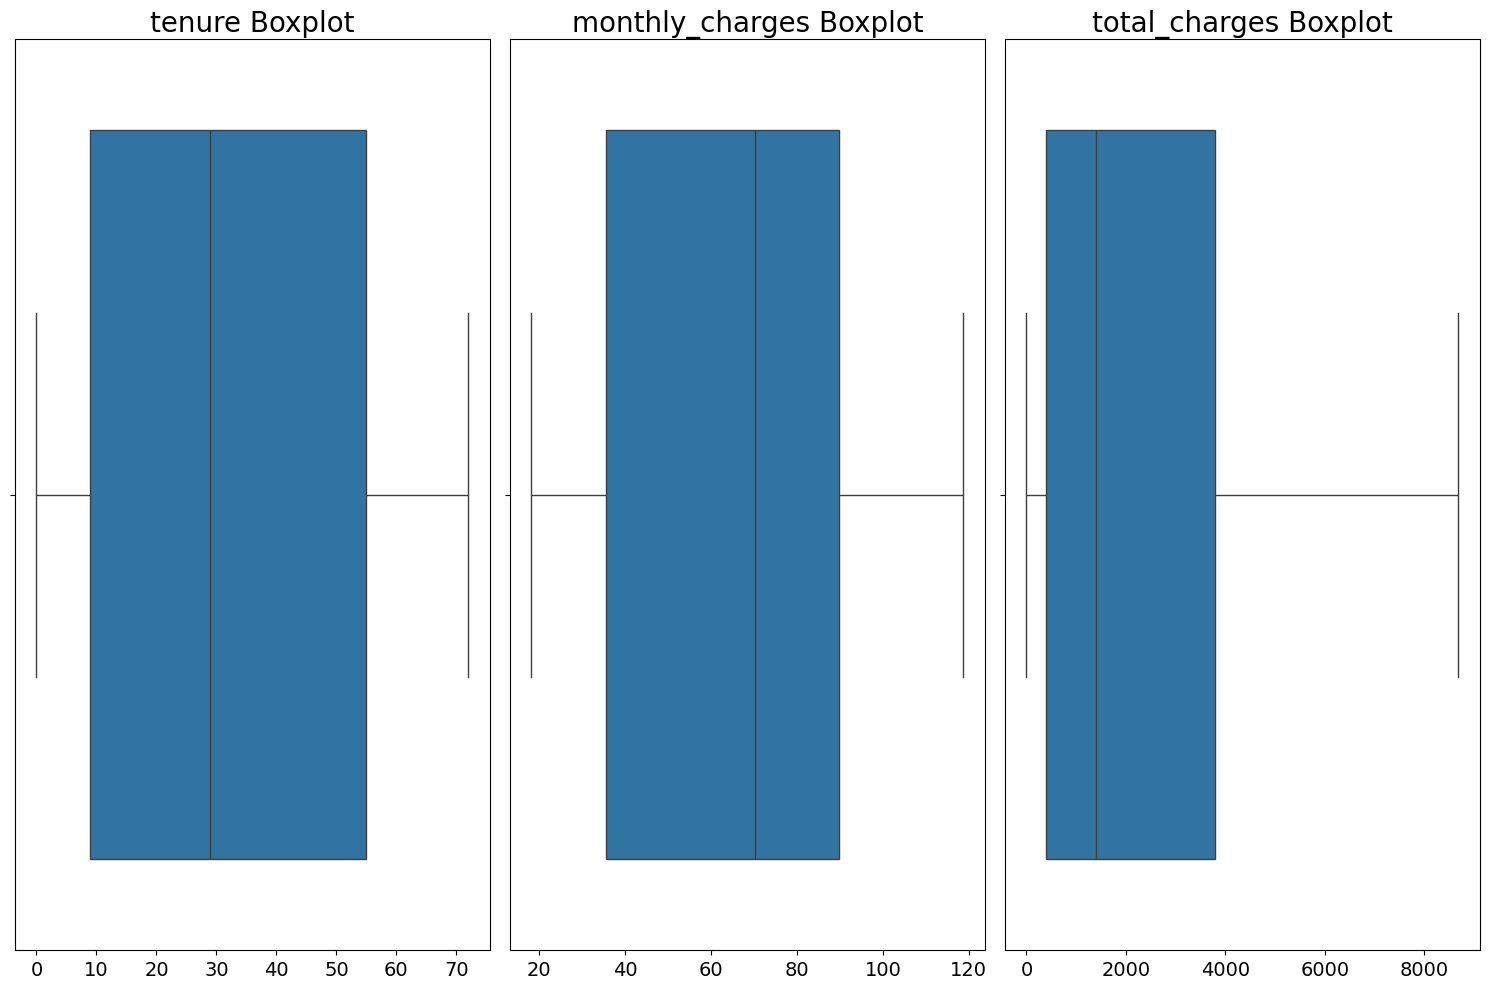

In [21]:
# Another look at the numerical data using boxplots - no obvious outliers
fig, ax = plt.subplots(1, 3, figsize = (15, 10))

for i, col in enumerate(charges_col):
    sns.boxplot(data = df, x = col, ax = ax[i]);
    set_text_params(ax[i], title = f'{col} Boxplot')

plt.tight_layout();

# EDA

## Feature Importance and Correlation with Dependent Variable (Churn)

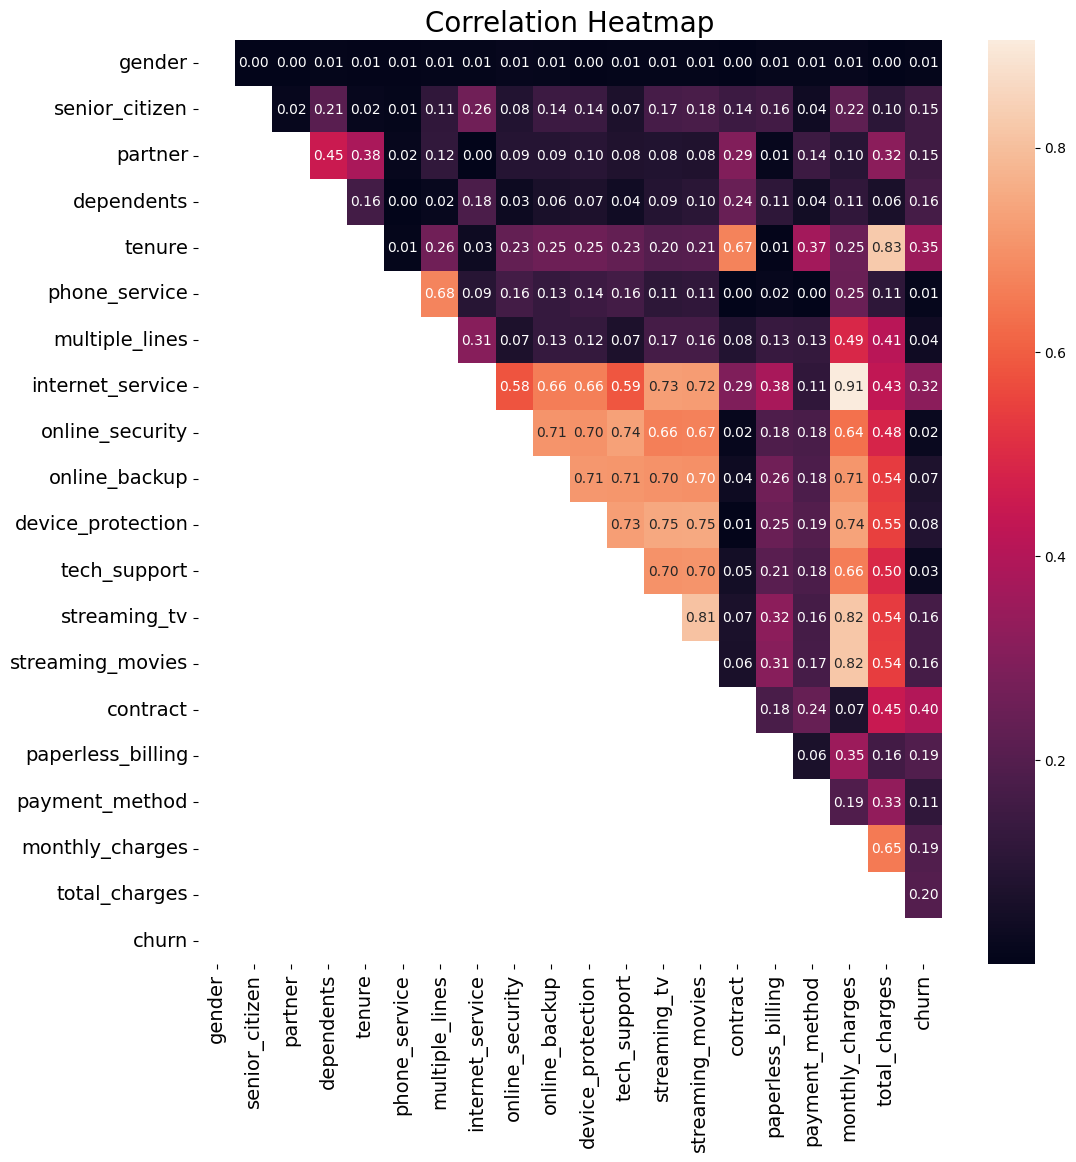

In [22]:
# Investigating correlation between columns
# Using absolute value to just extract magnitude
correlation_matrix = df.corr().abs()

fig, ax = plt.subplots(figsize = (12,12))

# Creating a mask to show only the upper triangle as the heatmap is very busy with this many columns
# Correlation in this case is symmetrical
mask = np.tril(correlation_matrix)
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", mask = mask, ax = ax);
set_text_params(ax, title = 'Correlation Heatmap');

/tmp/ipykernel_4538/530762065.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels);


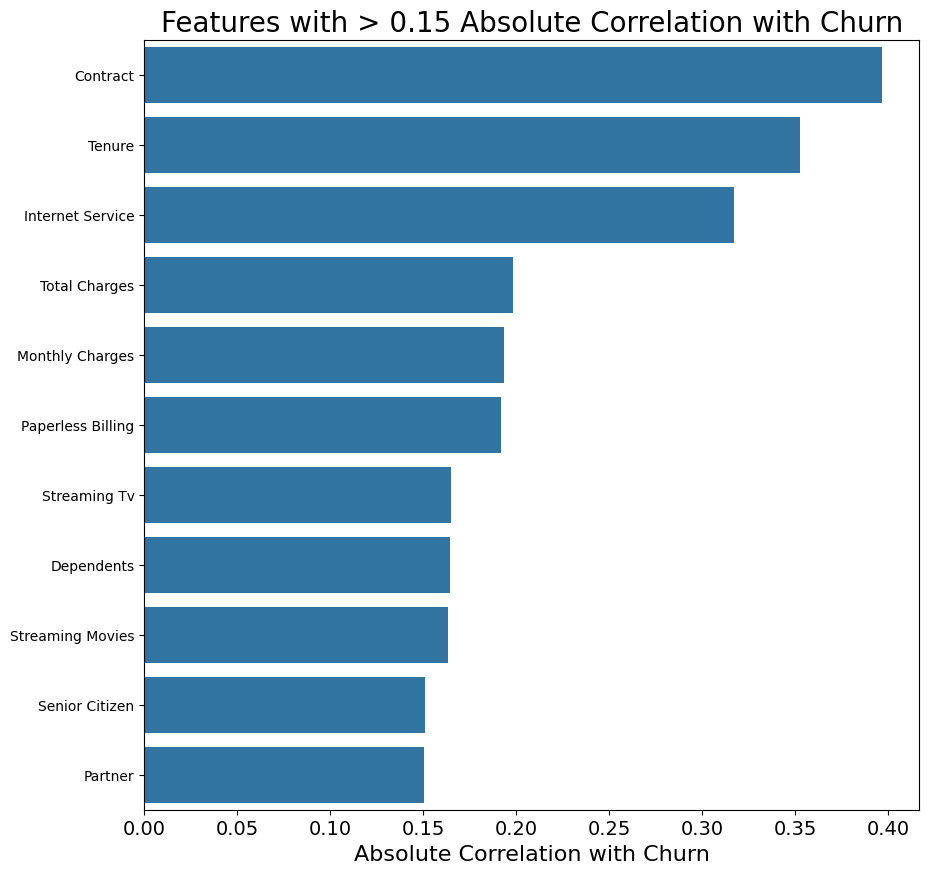

In [23]:
# Top features correlated with churn
fig, ax = plt.subplots(figsize = (10, 10))

# Extract most correlated features, slice at 1 to exclude churn itself
corr = correlation_matrix['churn'].sort_values(ascending = False)[1:]

# Extract column names for most correlated features
m_corr_col = corr[corr > 0.15].index.tolist()
yticklabels = [' '.join(x.split('_')).title() for x in m_corr_col]

# Plot data and set visual parameters
sns.barplot(data = corr[corr > 0.15], orient = 'h', ax = ax);
set_text_params(ax, title = 'Features with > 0.15 Absolute Correlation with Churn',
                xlabel = 'Absolute Correlation with Churn');
ax.set_yticklabels(yticklabels);
ax.tick_params(axis = 'x', labelsize = 14);
ax.tick_params(axis = 'y', labelsize = 10);

In [24]:
# Get a sense of overall churn rate: ~26.5%
df['churn'].value_counts(normalize = True)

churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

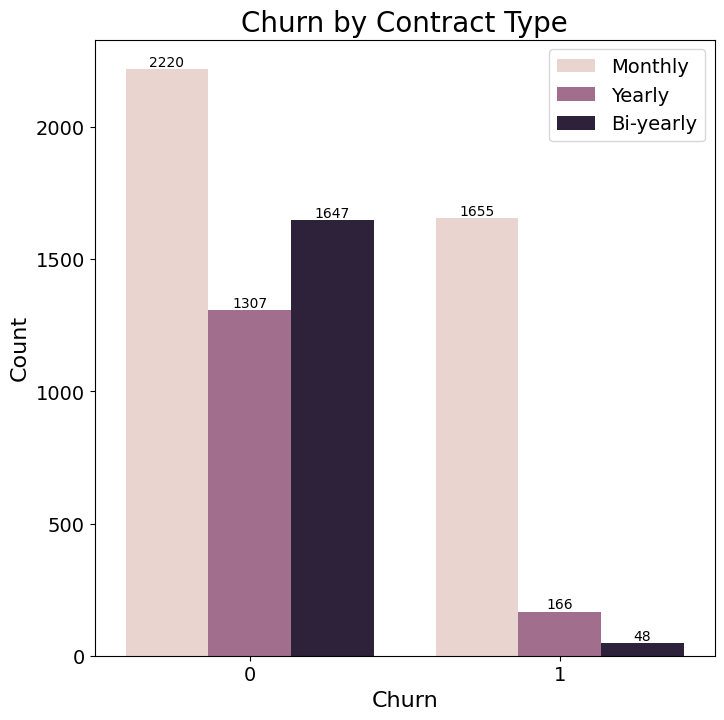

In [25]:
# Churn by contract type
# Customers are more likely to churn on a monthly contract
# Monthly churn: ~42.7%, yearly: ~11.27%, bi-yearly: ~2.8%
# Offer incentives to choose a yearly, or especially a bi-yearly contract to reduce churn
ax = categorical_by_categorical(df, 'contract', legend = ['Monthly', 'Yearly', 'Bi-yearly'],
                                title = 'Churn by Contract Type');

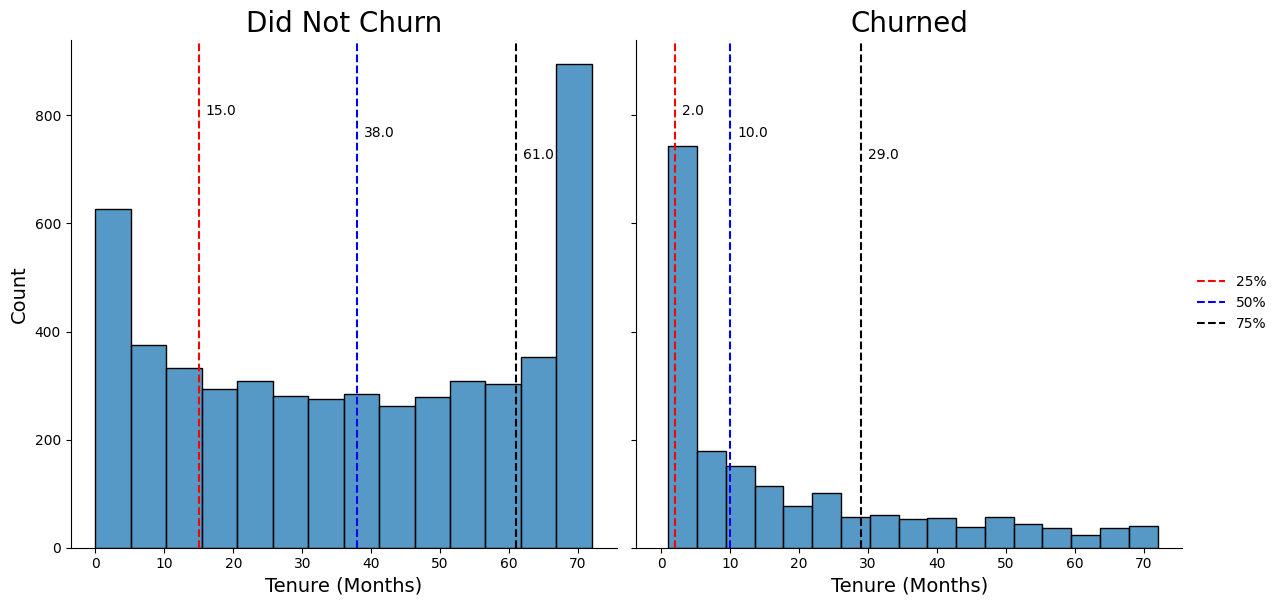

In [26]:
# Churn by tenure
# Half of churning customers churn within 10 months, 75% within ~2.5 years
# Roughly half of new customers churn in the first 6 months based on current data
# The longer you can keep a customer around, the less likely they are to churn going forward
g = categorical_by_numerical(df, 'tenure', xlabel = 'Tenure (Months)',
                             titles = ['Did Not Churn', 'Churned'], quartile_precision = 1);

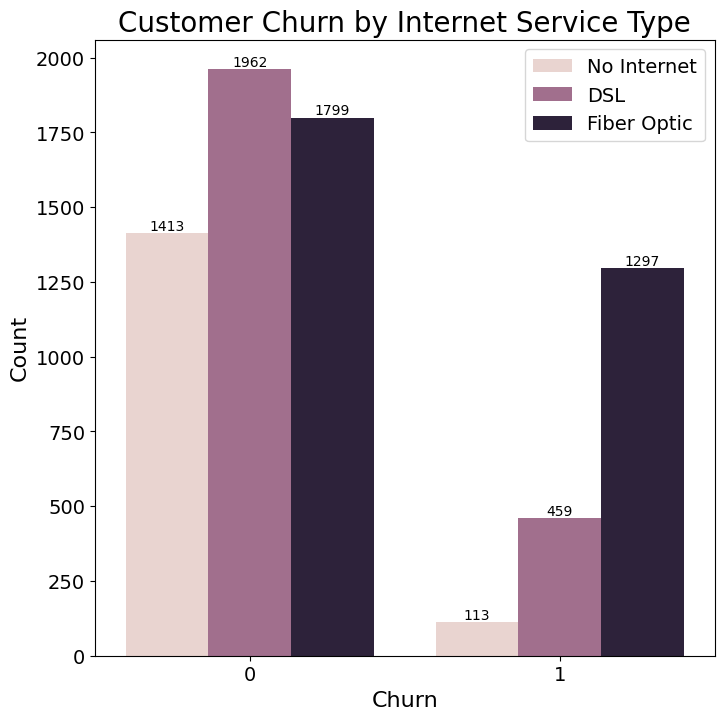

In [27]:
# Churn by Internet Service Type
# Most customers who exclusively acquire phone service (i.e., no internet service) do not churn
# ~42% of customers with fiber optic service churn compared to ~19% for DSL and ~7.4% for no internet
# This indicates that the fiber optic services should be improved or perhaps discontinued
ax = categorical_by_categorical(df, 'internet_service', title = 'Customer Churn by Internet Service Type',
                                legend = ['No Internet', 'DSL', 'Fiber Optic']);

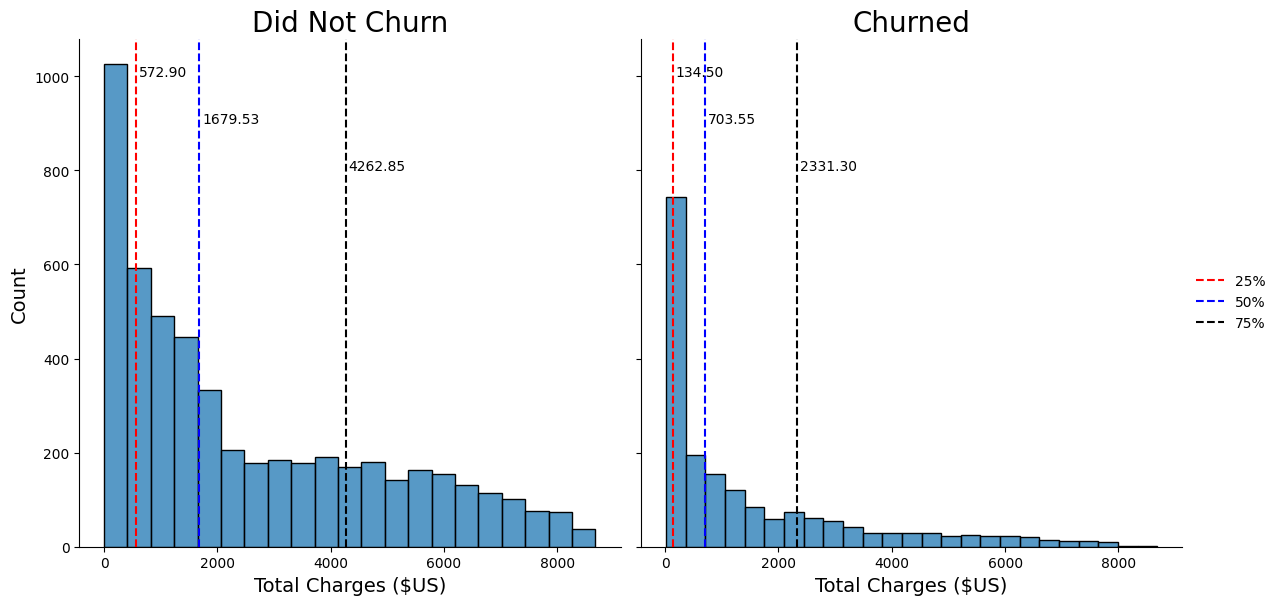

In [28]:
# Churn by total charges
# As expected, customers with low total charges (implied by the low tenure from earlier) are more likely to churn
g = categorical_by_numerical(df, 'total_charges', xlabel = 'Total Charges ($US)',
                             titles = ['Did Not Churn', 'Churned'],
                             quartile_label_height = 1000, quartile_yoffset = 0.1,
                             quartile_xoffset = 50, quartile_precision = 2);

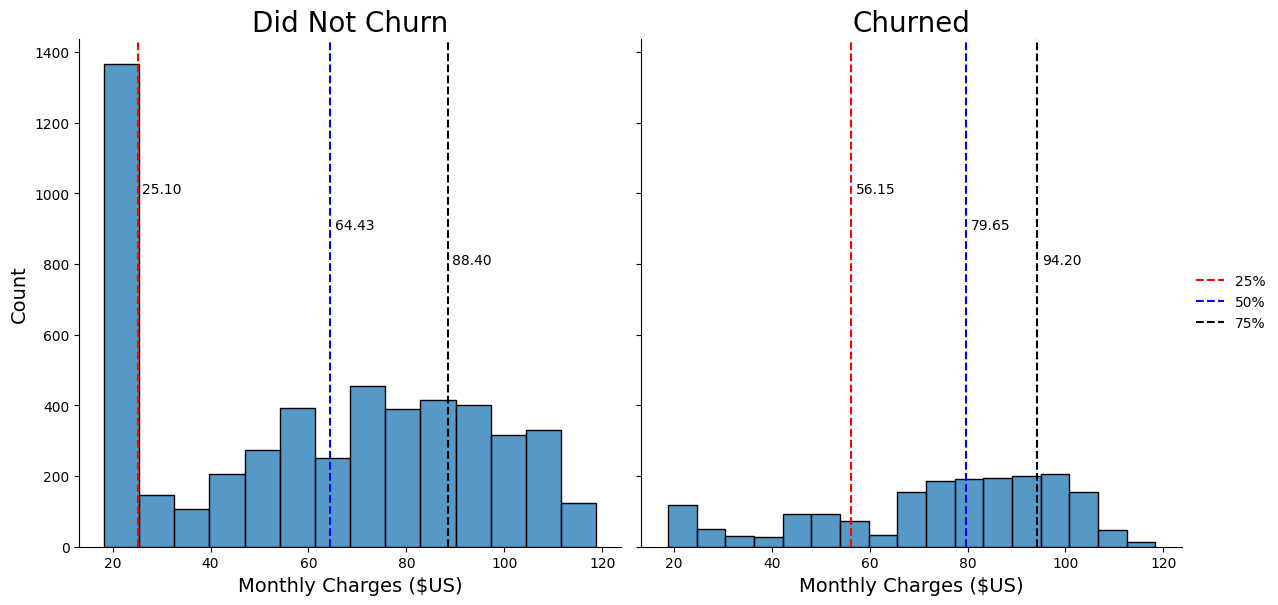

In [29]:
# Churn by monthly charges
# Customers with low monthly charges are unlikely to churn (< $40)
# Customers with medium monthly charges are extremely unlikely to churn ($40 - $60)
# Customers with high monthly charges (> $60) are more likely to churn
# Perhaps indicates that the top-end services offered are overpriced
# Mid-level sevices are priced correctly or at least offer high perceived value
g = categorical_by_numerical(df, 'monthly_charges', xlabel = 'Monthly Charges ($US)',
                             titles = ['Did Not Churn', 'Churned'],
                             quartile_label_height = 1000, quartile_yoffset = 0.1,
                             quartile_xoffset = 1, quartile_precision = 2);

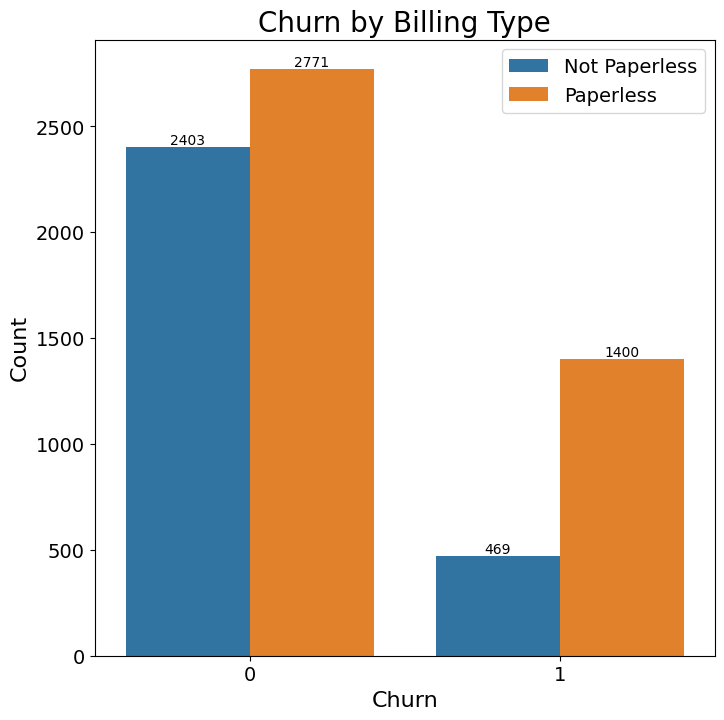

In [30]:
# Churn by billing type
# Paperless churn rate: ~33.6%, Not Paperless: ~16.33%
# Perhaps indicates that paperless billing is adding an additional charge that is undesirable
# or may just indicate that non-paperless customers are less likely to frivolously sign up for services
ax = categorical_by_categorical(df, 'paperless_billing',
                                legend = ['Not Paperless', 'Paperless'],
                                title = 'Churn by Billing Type');

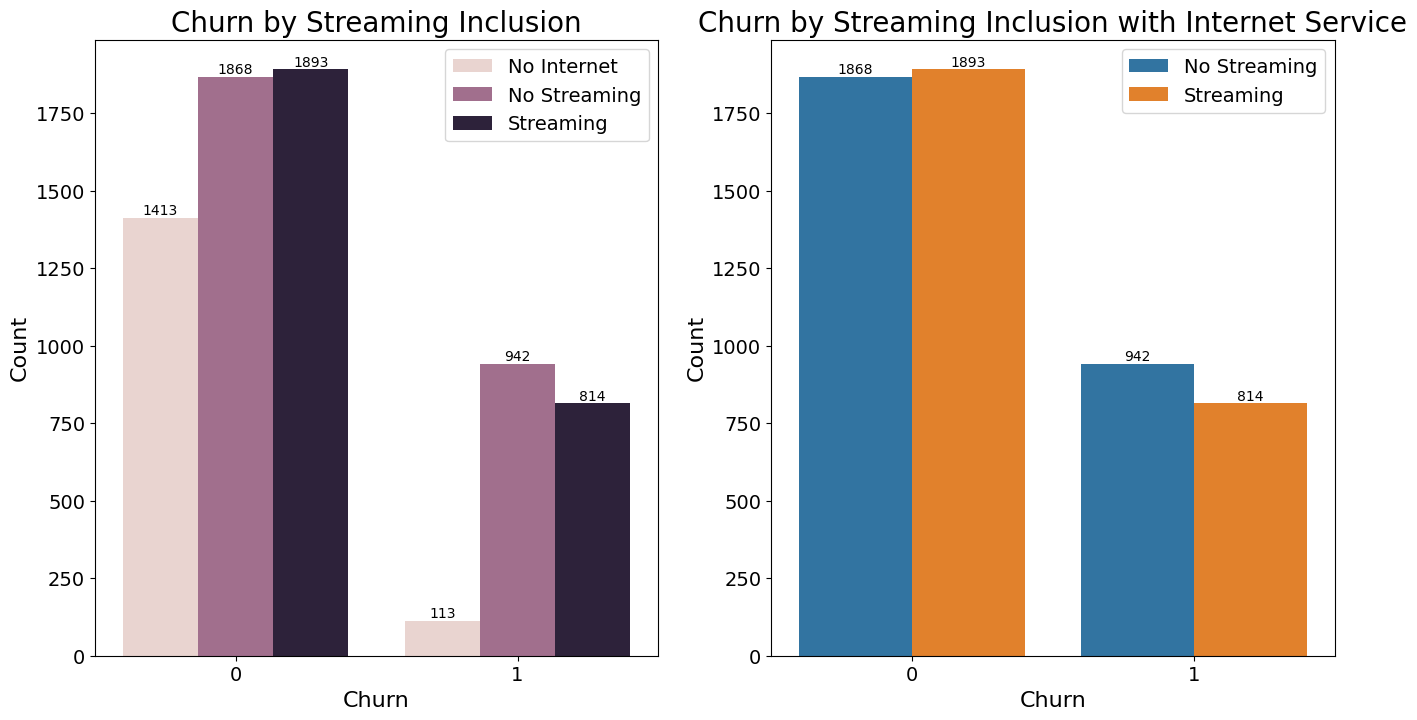

In [31]:
# Churn by Streaming Services
# Removing the group of customers with no internet, there is no discernable effect of streaming inclusion on churn
fig, ax = plt.subplots(1, 2, figsize = (16, 8))
ax[0] = categorical_by_categorical(df, 'streaming_tv',
                                   legend = ['No Internet', 'No Streaming', 'Streaming'],
                                   title = 'Churn by Streaming Inclusion', ax = ax[0]);
ax[1] = categorical_by_categorical(df, 'streaming_tv',
                                   subset_cond = -1,
                                   legend = ['No Streaming', 'Streaming'],
                                   title = 'Churn by Streaming Inclusion with Internet Service', ax = ax[1]);

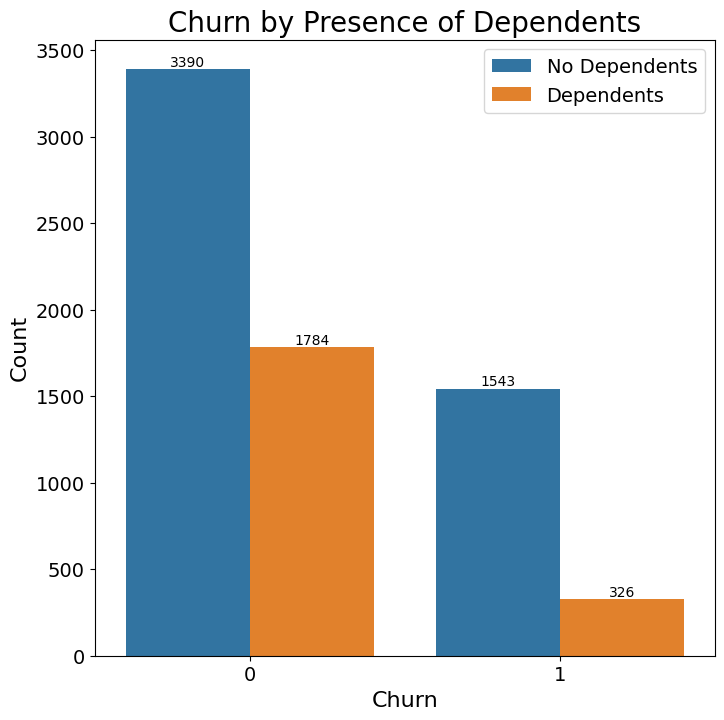

In [32]:
# Churn by presence of dependents
# No dependents churn rate: ~31.3%, with dependents churn rate: ~15.5%
# Indicates that customers with dependents may rely on services to keep dependents occupied
# May also indicate that family-friendly offerings are successful and should continue to be offered
# Marketing towards families may be beneficial in acquiring more non-churning customers
# To try to retain more non-dependent customers, more services geared towards non-family tastes may be needed
ax = categorical_by_categorical(df, 'dependents',
                                legend = ['No Dependents', 'Dependents'],
                                title = 'Churn by Presence of Dependents');

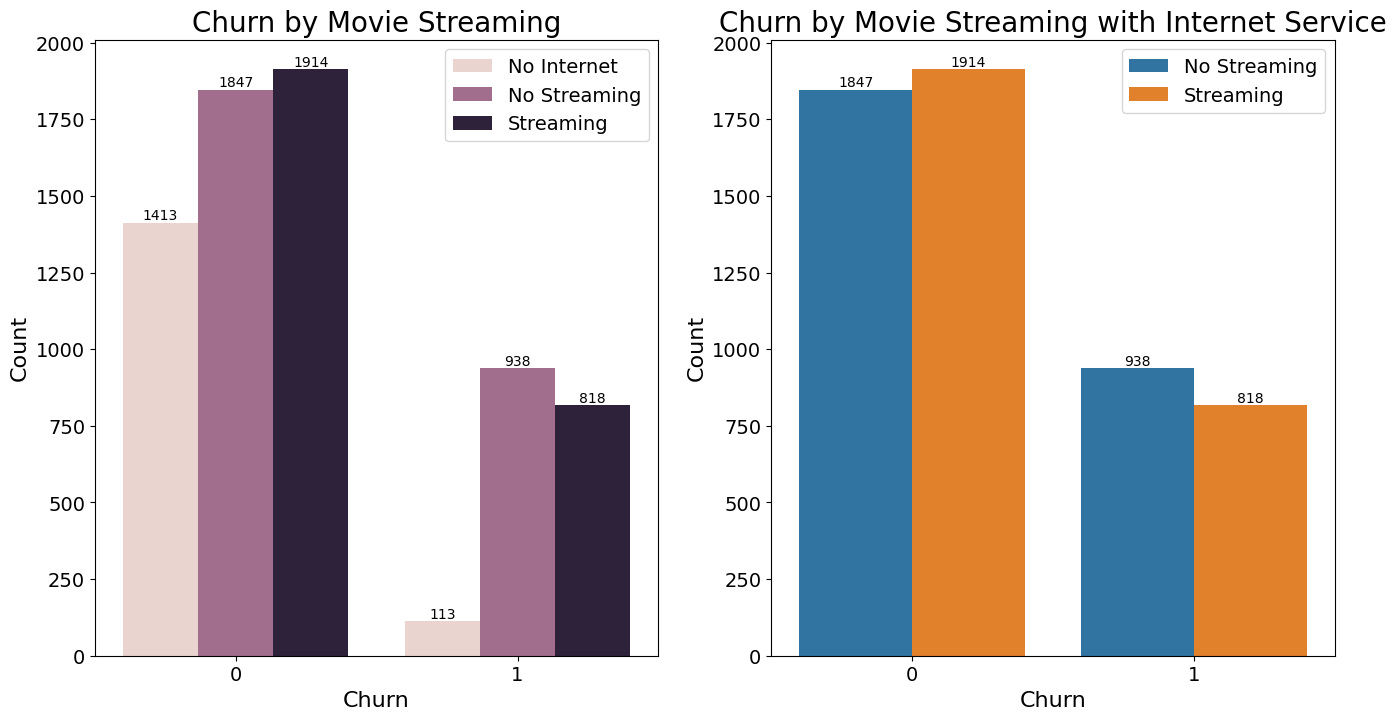

In [33]:
# Churn by Movie Streaming Services
# Removing the group of customers with no internet, there is no discernable effect of movie streaming on churn
fig, ax = plt.subplots(1, 2, figsize = (16, 8))
ax[0] = categorical_by_categorical(df, 'streaming_movies',
                                   legend = ['No Internet', 'No Streaming', 'Streaming'],
                                   title = 'Churn by Movie Streaming', ax = ax[0]);
ax[1] = categorical_by_categorical(df, 'streaming_movies',
                                   subset_cond = -1,
                                   legend = ['No Streaming', 'Streaming'],
                                   title = 'Churn by Movie Streaming with Internet Service', ax = ax[1]);

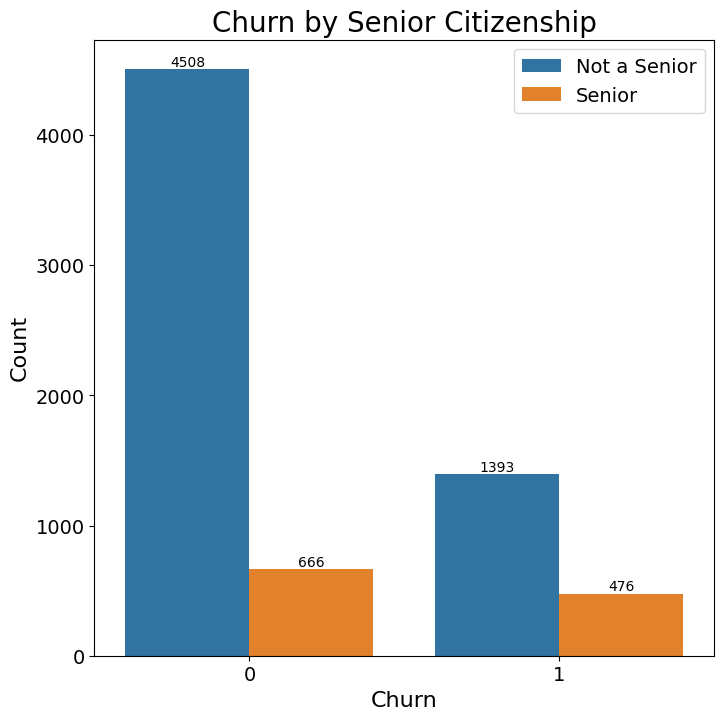

In [34]:
# Churn by senior citizenship
# Senior Churn Rate: ~41.7%, Non-Senior Churn Rate: ~23.6%
# Indicates that there may not be enough services to satisfy senior citizens
# Perhaps they have difficulty setting up / using the services or more shows catering to their tastes are needed
# (Classic movies, Hallmark channel type shows, game shows are possible examples)
# Given the low presence of senior citizens, it may be beneficial to instead focus on marketing and services
# for non-senior groups
ax = categorical_by_categorical(df, 'senior_citizen',
                                legend = ['Not a Senior', 'Senior'],
                                title = 'Churn by Senior Citizenship');

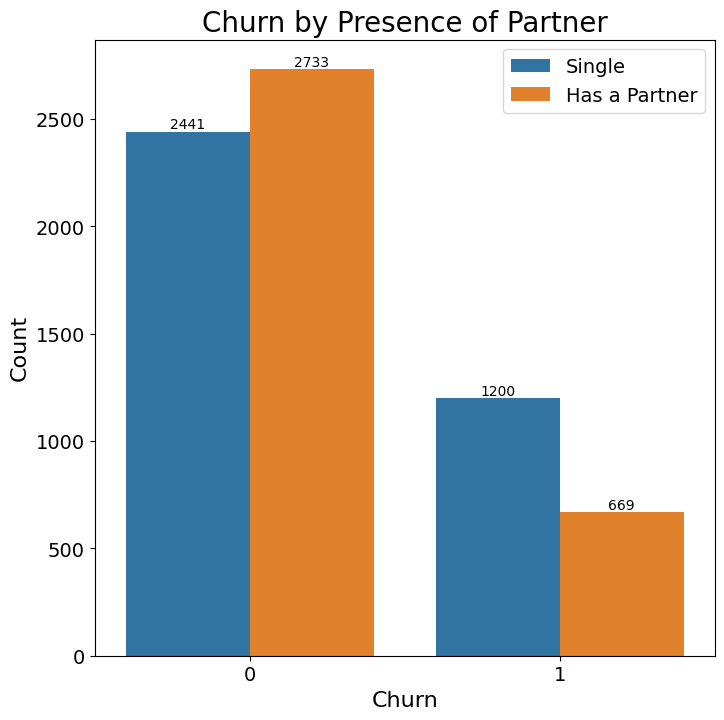

In [35]:
# Churn by Partner
# Churn rate w/ partner: ~19.66%, churn rate w/o partner: ~33%
# Customers with partners are less likely to churn, probably due to having someone to share services
# such as movies/streaming with.
# Catering/marketing to the non-single customer base would appear to be useful for lowering churn.
# Single customers do make up a significant portion of the customer base
# so it may be prudent to try to find services that would keep them around to reduce their churn rate.

ax = categorical_by_categorical(df, 'partner',
                                legend = ['Single', 'Has a Partner'],
                                title = 'Churn by Presence of Partner');

## Inter-Feature Correlation

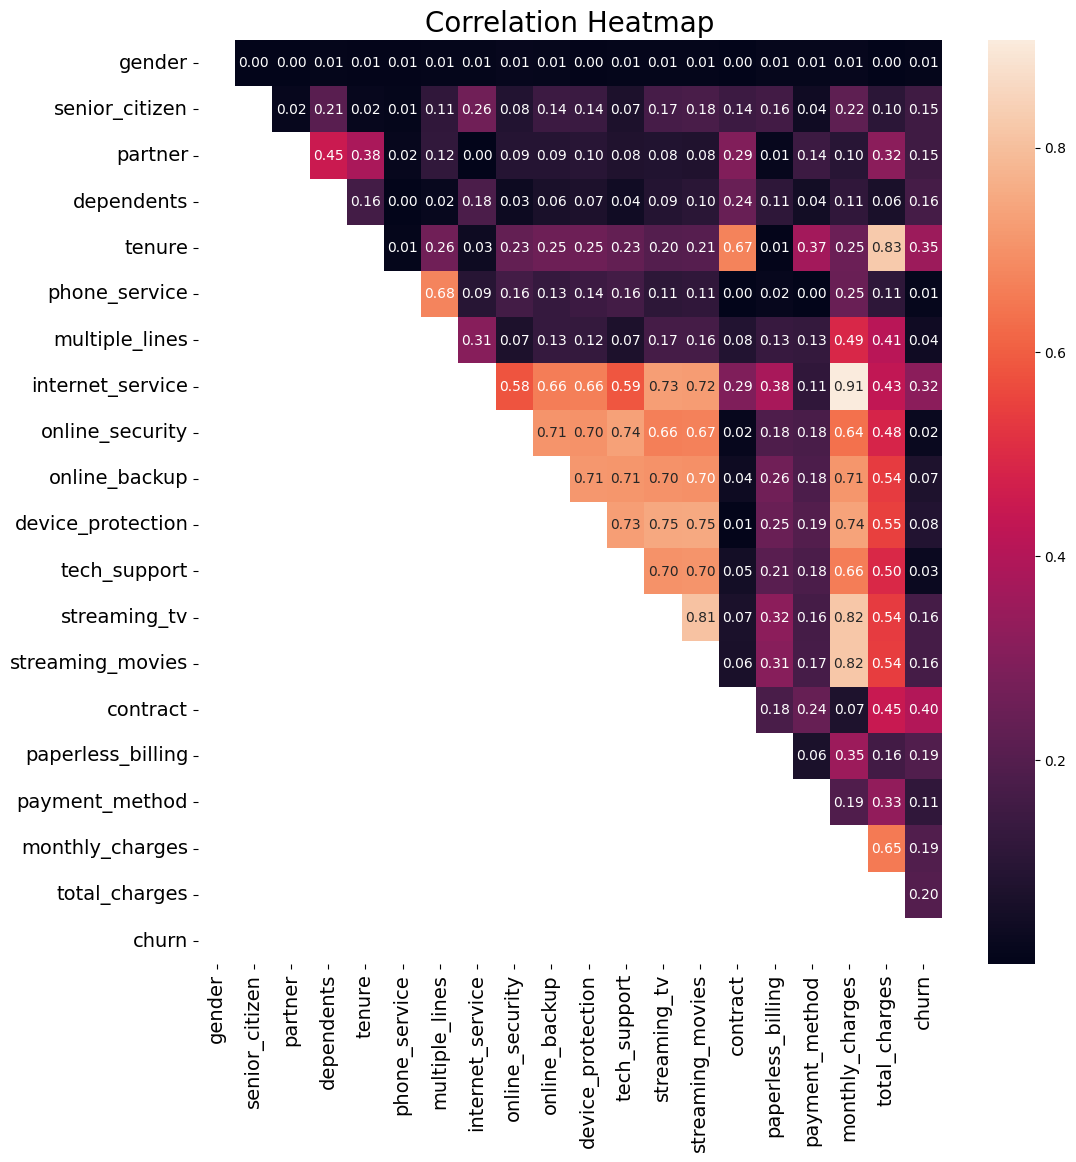

In [36]:
# Correlation Heatmap from earlier, a number of features are highly correlated
fig, ax = plt.subplots(figsize = (12,12))

# Creating a mask to show only the upper triangle as the heatmap is very busy with this many columns
# Correlation in this case is symmetrical
mask = np.tril(correlation_matrix)
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", mask = mask, ax = ax);
set_text_params(ax, title = 'Correlation Heatmap');

In [37]:
# Select the top 5 correlated columns for each feature
top5_corr = [correlation_matrix[x].sort_values(ascending = False)[1:6] for x in df.columns]
# Exclude correlated columns with less than 0.5 correlation
top5_corr = [x[x > 0.5] for x in top5_corr]
# Drop empty series
top5_corr = [x for x in top5_corr if len(x.index) != 0]

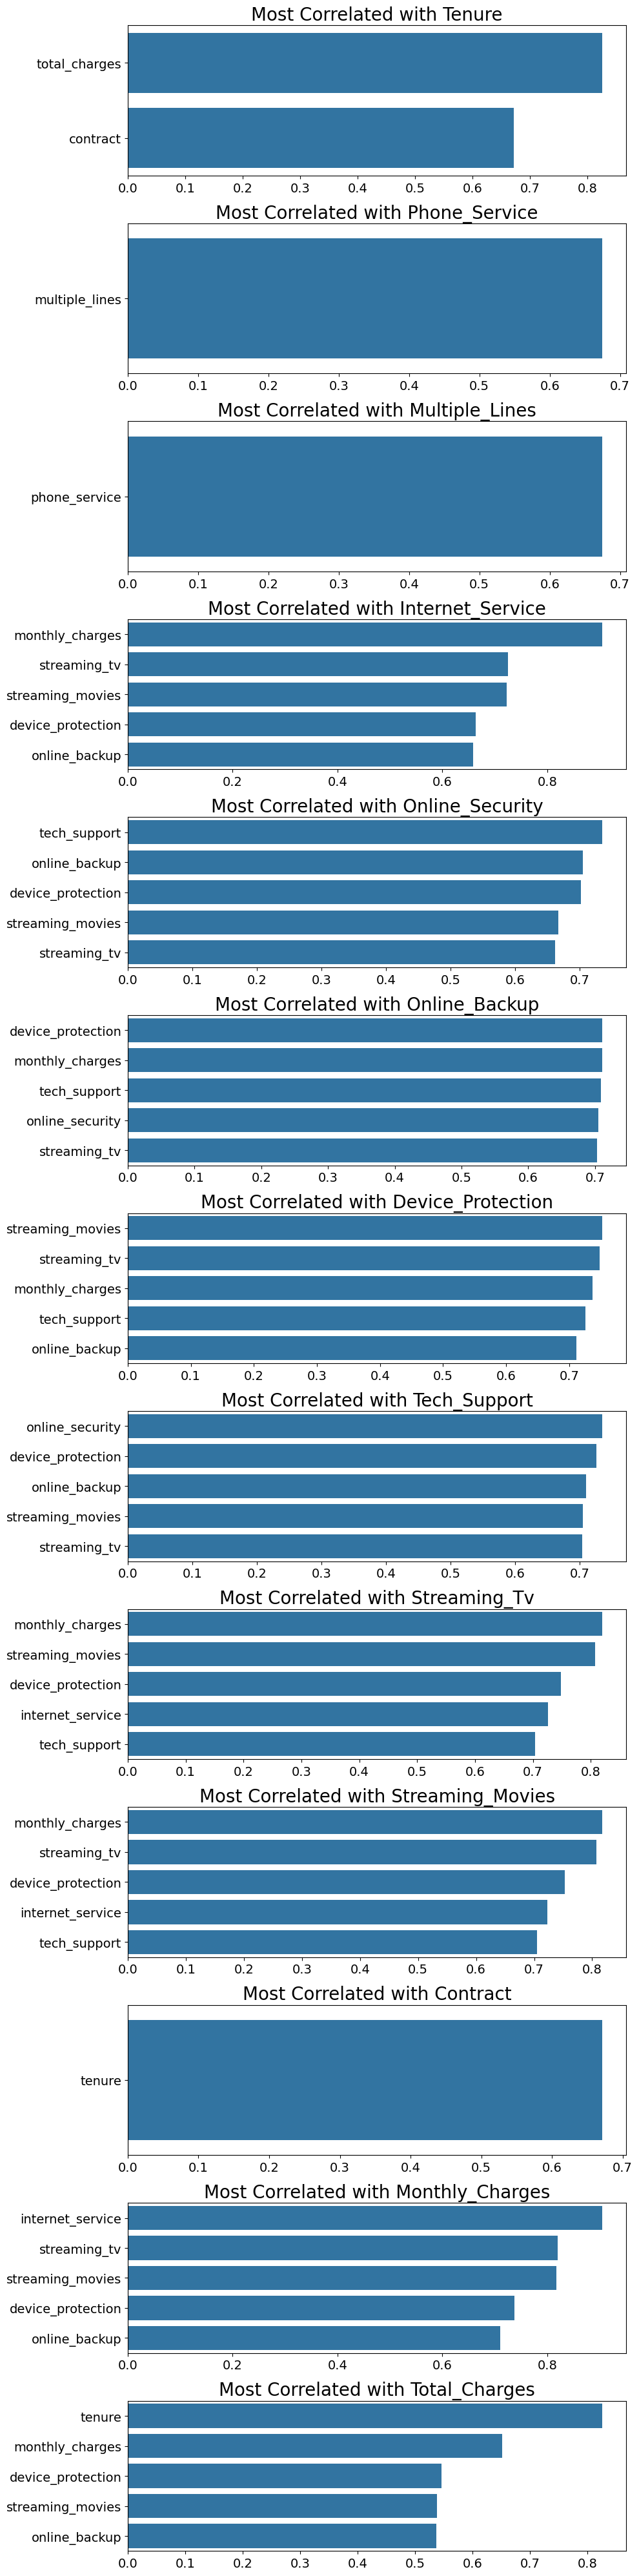

In [38]:
# Plot inter-feature correlations
fig, ax = plt.subplots(len(top5_corr), 1, figsize = (10, 40))

for i, col in enumerate(top5_corr):
    sns.barplot(data = col, orient = 'h', ax = ax[i])
    set_text_params(ax[i], title = f'Most Correlated with {col.name.title()}')
    
plt.tight_layout();

### Inter-Feature Correlation Notes (Not Investigated Graphically)

Total Charges: Most strongly correlated with Tenure and Monthly Charges. This is expected, as Total Charges = Tenure * Monthly Charges and thus can be calculated directly from the other two features.

Tenure: Correlation with Contract explored below. Correlation with Monthly Charges is obvious from above statement.

Monthly Charges: Monthly Charges should be correlated with all offered services, since the inclusion/exclusion of those services should directly change the amount charged to the customer. For that reason, only the correlations with Internet Service, Streaming TV, and Streaming Movies are investigated below.

Multiple Lines and Phone Service are naturally connected, as a customer obviously cannot have multiple lines if they do not have phone service.

Internet Service is clearly connected to Streaming TV, Streaming Movies, Device Protection, and Online Backup, as customers without internet service cannot have any of the related auxiliary services.

Online Backup, Device Protection, Online Security, and Tech Support are all highly correlated, which makes sense, as they are likely offered as a bundle, and customers who are interested in one of these services are likely interested in all of these services.

Streaming TV and Streaming Movies being highly correlated makes sense, as most customers who want to stream content likely stream both, and if they do not want to stream, then they are probably not interested in either.

### Other Inter-Feature Correlations Explored Graphically

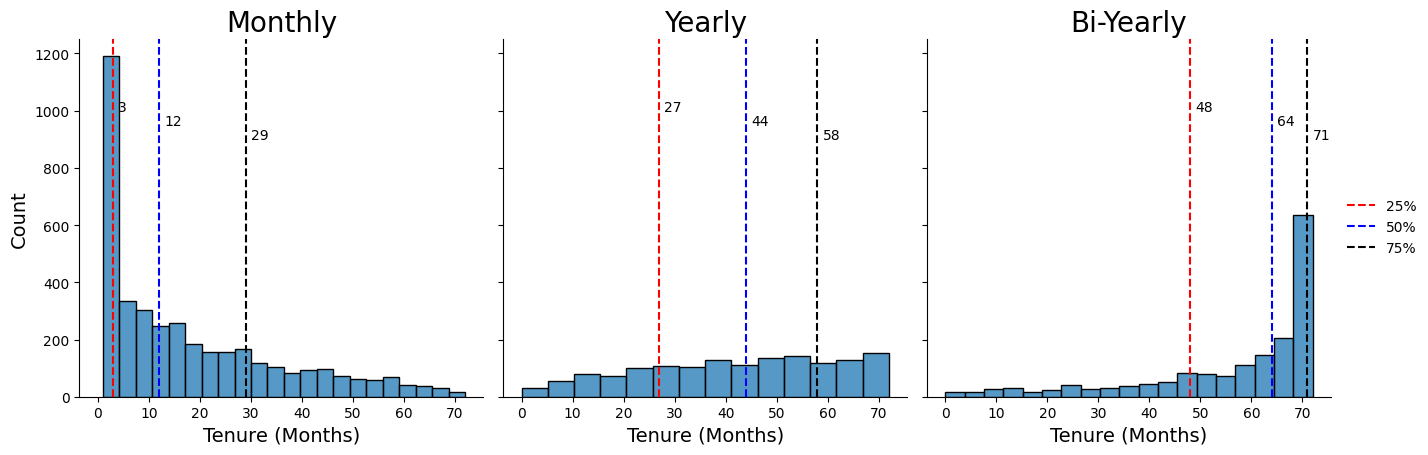

In [39]:
# Tenure and Contract correlation
# Long-term contracts tend to be held by those with a long tenure
categorical_by_numerical(df, 'tenure', target = 'contract',
                         titles = ['Monthly', 'Yearly', 'Bi-Yearly'],
                         xlabel = 'Tenure (Months)', 
                         quartile_label_height = 1000, quartile_precision = 0, height = 4.5);

In [40]:
df[['internet_service', 'monthly_charges']].groupby('internet_service').mean()

,monthly_charges
internet_service,
0,21.079194
1,58.102169
2,91.500129


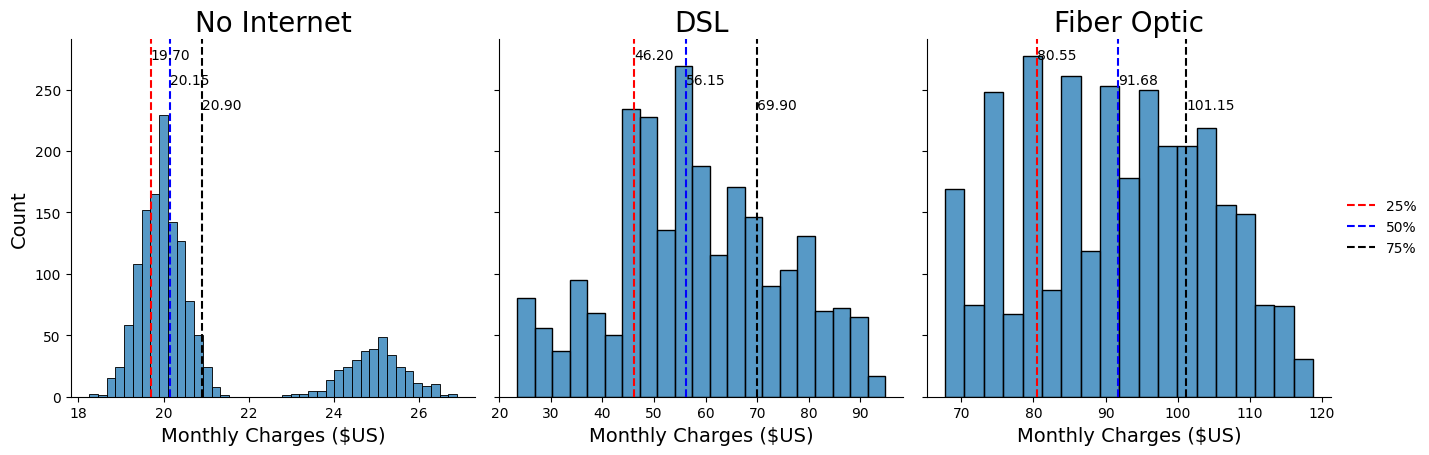

In [41]:
# Monthly Charges and Internet Service
# Clearly the type of internet service is correlated with monthly charges; more advanced internet leads to higher bills
# A jump in average monthly charges of $37 from no internet to DSL, and a jump of $33.4 from DSL to Fiber Optic
# However, the distribution is rather spread out for DSL and Fiber Optics customers, and No Internet is bimodal
# This means internet type might influence general monthly charge class ($18-$26, $26-95, $65-115)
# but not where in the class a customer is likely to lie
categorical_by_numerical(df, 'monthly_charges', target = 'internet_service',
                         titles = ['No Internet', 'DSL', 'Fiber Optic'],
                         xlabel = 'Monthly Charges ($US)',
                         quartile_label_height = 275, quartile_xoffset = 0, quartile_precision = 2,
                         quartile_yoffset = 0.075, height = 4.5, sharex = False);

In [42]:
df[['streaming_tv', 'monthly_charges']].groupby('streaming_tv').mean()

,monthly_charges
streaming_tv,
-1,21.079194
0,65.387687
1,88.736738


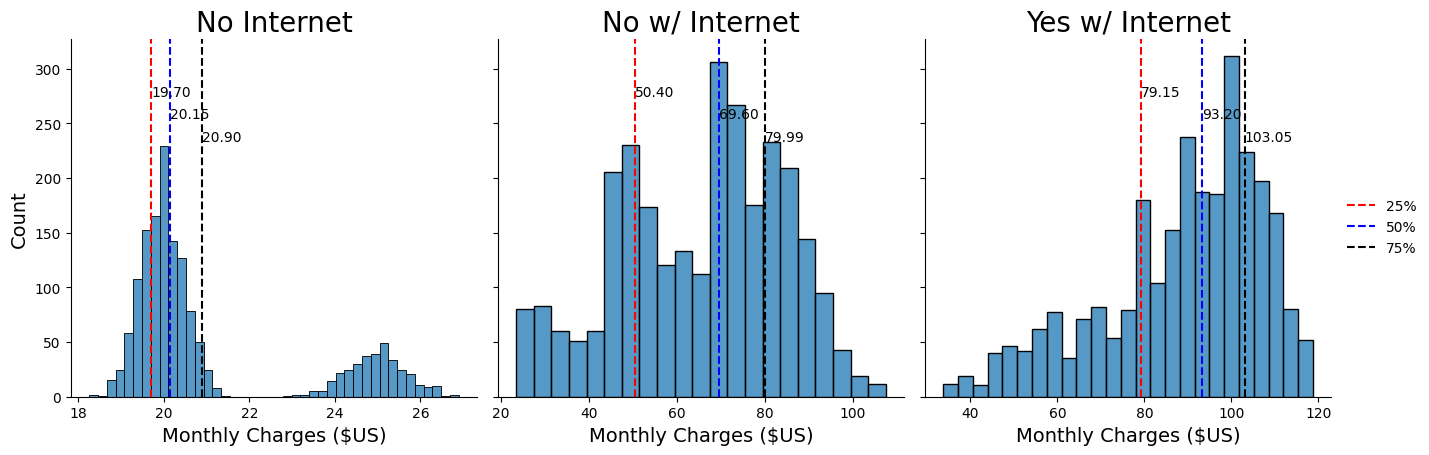

In [43]:
# Monthly Charges and Streaming TV
# Clearly the jump between No Internet and No w/ Internet is pulled by Internet Service
# The jump between No Streaming and Streaming is about $23.4 on average
categorical_by_numerical(df, 'monthly_charges', target = 'streaming_tv',
                         titles = ['No Internet', 'No w/ Internet', 'Yes w/ Internet'],
                         xlabel = 'Monthly Charges ($US)',
                         quartile_label_height = 275, quartile_xoffset = 0, quartile_precision = 2,
                         quartile_yoffset = 0.075, height = 4.5, sharex = False);

In [44]:
df[['streaming_movies', 'monthly_charges']].groupby('streaming_movies').mean()

,monthly_charges
streaming_movies,
-1,21.079194
0,65.434147
1,88.475714


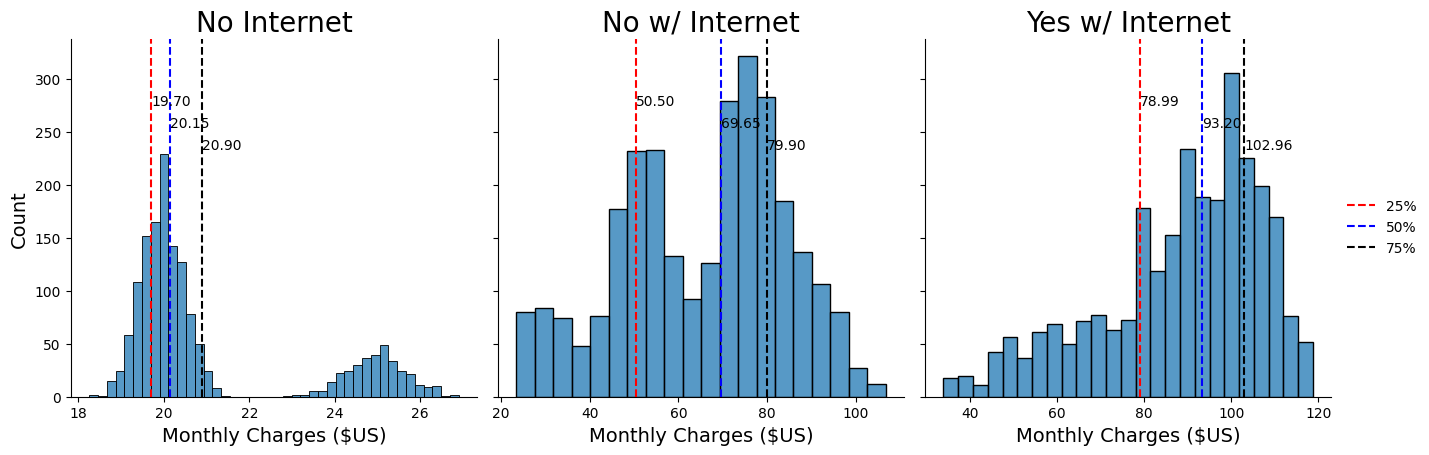

In [45]:
# Monthly Charges and Streaming Movies
# Basically identical to Streaming TV
# Highly indicative that most customers who can Stream TV can also Stream Movies
# Price increase thus is probably split between TV and Movies with most customers having both
categorical_by_numerical(df, 'monthly_charges', target = 'streaming_movies',
                         titles = ['No Internet', 'No w/ Internet', 'Yes w/ Internet'],
                         xlabel = 'Monthly Charges ($US)',
                         quartile_label_height = 275, quartile_xoffset = 0, quartile_precision = 2,
                         quartile_yoffset = 0.075, height = 4.5, sharex = False);

# Conclusion and Notes

Without developing a specific model, there are two different methods of evaluating the course of action based on feature importance. The first is to minimize churn rate by focusing on areas which already encourage low churn by essentially betting on the already winning strategies. The second is to minimize churn rate by trying to improve areas which experience high churn rate to try to reduce customer loss across feature, essentially maximizing the strength of the features themselves. These two strategies are not mutually exclusive.

---

Based on strategy 1: Focusing on low-churn rate strategies

The presence of Partners or Dependents appears to lead to low churn rate, which means marketing should focus on acquiring more customers that fit these demographic profiles and services should continue to be offered which cater to these demographics (family channels, romantic movies, etc.). Customers with no internet service have extremely low churn rate, and those with DSL connections have moderate churn but lower than average churn in the dataset. Thus, the company should focus on acquiring customers interested primarily in phone service without internet and on marketing their DSL internet. Customers with yearly or bi-yearly contracts appear to be very happy and show low churn rates, so the company should continue to offer incentives to entice customers into longer contracts.

The company should avoid marketing towards senior citizens, as senior citizen customers are much more likely to churn than non-senior citizen customers. The company's fiber optic services seem to cause a lot of customer dissatisfaction, so the company should deemphasize those services or possibly consider dropping them. Monthly contracts are probably a necessary offering; however, the company should try to get customers converted to longer-term contracts when possible. Customers are much more likely to churn with shorter tenures, so perhaps it may be best to offer special deals to try to keep customers hooked for longer periods.

Customers with low or moderate monthly charges churn less frequently, so it may be useful to promote the cheaper service packages. On the other hand, while keeping customers around generates long term revenue, if each customer brings in less individual revenue, it may be difficult to acquire the volume of customers needed for further profitability.

---

Based on strategy 2: Improving poor areas of high churn rate

The company's fiber optic connections are clearly below the standards of the market or are priced much too high. By improving the fiber optic offerings, the company should be able to retain many more customers while offering a higher quality service - a win-win for all parties; however, this may not be feasible depending on the cost to upgrade the fiber optic infrastructure. Customers without dependents or partners show a higher tendency to churn. While this may be inevitable, it may be wise to perform some market research to try to capture a greater portion of this customer demographic. This may be especially important given that non-family customers are ~70% of the customer base, single customers are ~51.7% of the customer base, and single non-family customers are ~46.6% of the customer base.

Senior citizen customers make up only ~16.2% of the customer base but experience an astounding ~41.7% churn rate. This group may not be critical to try to capture, but if the company wished to try to keep as many of its current customers as possible, it may be prudent to try to expand the offerings for senior citizens (such as better shows or technical support/setup).

Customers with high monthly charges are more likely to churn. This may indicate that certain features are overpriced or that the quality of expensive services, such as fiber optic internet, is lacking. The company could consider lowering the prices of some of its top-end services or try to increase the quality of those services to reduce churn rate of the highest revenue-generating customers.

---

Notes and Limitations:

The gender feature is somewhat outdated as it only captures male/female. However, this feature appears to have very little relevance in determining churn rate and can probably be discarded.

The age cutoff for Senior Citizenship is unclear and may be misleading. For example, if the cutoff is 65, it is unlikely that a customer who was 64 the year prior will have significantly different needs or tastes. What happens in 5 years? 10 years? This feature may be problematic long-term without careful research backing up ongoing trends among aging populations.

There are certain features which may be useful which are not present in this data.

1) Location information
2) Time information
3) Income information
4) Customer Support/Feedback Information

Knowing the location of customers can be useful for understanding churn rate by geographical location. Some locations may be more prone to churn than others, perhaps due to poor infrastructure in those locations or due to socioeconomic differences between locations. Knowing when customers churn can be useful for understanding how churn rate changes over time and to identify trends in churn. Some churn rate may be tied to seasonality or to economic conditions, and when combined with location information, it may be useful for identifying how churn by location changes over time. Income information may be difficult to acquire but could lead to ways to identify how to adjust pricing and marketing to reduce churn rate. Income information can help to figure out spending habits and to tailor services offered. Finally, knowing how many customer support tickets were filed per customer can help to capture customer dissatisfaction with the company's services, which can lead towards understanding churn rate. Customer feedback for when they churn can offer insight into places where the company's services are weak, and by improving those areas, perhaps the churn rate can be lowered.

A downside to these types of information is that they may be difficult or expensive to capture. In addition, they can introduce certain biases by choice of grouping. For example, grouping customers by location can lead to dramatically different results based on which areas are grouped together, or income data can lead to biases towards certain income groups. Another issue is that this information is not necessarily able to be input into standard regression or classification models without significant preprocessing and transformation - customer support tickets may require natural language processing and time data may be better suited to time series data. These operations increase the cost of processing the data and may be unnecessary.